<a href="https://colab.research.google.com/github/yohannes242005/thesis/blob/main/print_all_in_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2
import numpy as np
import os
import glob
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
#from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense,Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
from keras import backend as K



from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [6]:
def k_means_segmentation(img):
  twoDimage = img.reshape((-1,3))
  twoDimage = np.float32(twoDimage)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 2
  attempts=1
  ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  return result_image

In [7]:
def color_mask_segmentation(img):
  hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
  light_blue = (90, 70, 50)
  dark_blue = (128, 255, 255)
  # You can use the following values for green
  light_green = (40, 40, 40)
  # dark_greek = (70, 255, 255)
  mask = cv2.inRange(hsv_img, light_blue, dark_blue)
  result = cv2.bitwise_and(img, img, mask=mask)
  return result

In [8]:
SIZE = 128
train_image = []
train_label = []
for dir_path in glob.glob("/content/drive/My Drive/final pepper dataset one folder3,330/*"):
    label = dir_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        #img = color_mask_segmentation(img)
        #img = cv2.GaussianBlur(img,(5,5),0)

        train_image.append(img)
        train_label.append(label)
train_image = np.array(train_image)
train_label = np.array(train_label)

/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/78Fr.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/89Fr.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/1.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/2.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/3.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/4.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/5.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/6.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/7.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/8.jpg
/content/drive/My Dri

In [9]:
from sklearn import preprocessing
from keras.utils.all_utils import to_categorical

le = preprocessing.LabelEncoder()
le.fit(train_label)
train_labe_encoded = le.transform(train_label)

x_train,y_train = train_image,train_labe_encoded
x_train = x_train/255.0
y_train_one_hot = to_categorical(y_train)

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_train,y_train_one_hot,test_size=0.30,shuffle=True,random_state=42,stratify=y_train_one_hot)

x_validation,x_test,y_validation,y_test = train_test_split(x_test,y_test,test_size=0.5,shuffle=True,random_state=42,stratify=y_test)

In [36]:
model_1 = Sequential()
model_1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape = (128,128,3)))
model_1.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))


model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))

model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))

model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_1.add(BatchNormalization())

model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))

model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_1.add(BatchNormalization())

model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_1.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))

In [37]:
model_1.add(Flatten())
#model_1.add(Dropout(0.005))
model_1.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(units=6, activation="softmax"))
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_27 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 3)         1731      
                                                                 
 conv2d_29 (Conv2D)          (None, 64, 64, 3)         84        
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 3)        0         
 g2D)                                                 

In [10]:
# tell the model what cost and optimization method to use
model_1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# fit the model
r = model_1.fit(x_train,y_train,epochs=100,validation_data=(x_validation,y_validation))

Epoch 1/100
70/70 [==============================] - 16s 61ms/step - loss: 1.5686 - accuracy: 0.3432 - val_loss: 1.8797 - val_accuracy: 0.1211
Epoch 2/100
70/70 [==============================] - 3s 36ms/step - loss: 1.2845 - accuracy: 0.5329 - val_loss: 2.1662 - val_accuracy: 0.1211
Epoch 3/100
70/70 [==============================] - 3s 39ms/step - loss: 1.0442 - accuracy: 0.6407 - val_loss: 2.4618 - val_accuracy: 0.1211
Epoch 4/100
70/70 [==============================] - 3s 37ms/step - loss: 0.7921 - accuracy: 0.7360 - val_loss: 2.7422 - val_accuracy: 0.1211
Epoch 5/100
70/70 [==============================] - 3s 36ms/step - loss: 0.6357 - accuracy: 0.7852 - val_loss: 3.0265 - val_accuracy: 0.1211
Epoch 6/100
70/70 [==============================] - 3s 36ms/step - loss: 0.5509 - accuracy: 0.8107 - val_loss: 2.8910 - val_accuracy: 0.1211
Epoch 7/100
70/70 [==============================] - 3s 36ms/step - loss: 0.5373 - accuracy: 0.8188 - val_loss: 1.9971 - val_accuracy: 0.1775
Epoch

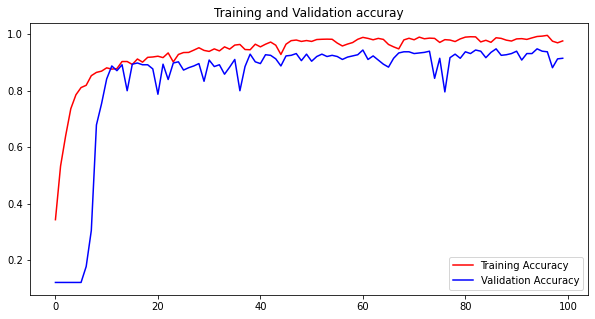

<Figure size 2160x1080 with 0 Axes>

In [12]:
acc = r.history['accuracy']

val_acc = r.history['val_accuracy']

#loss = r.history['loss']

#val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,5))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

#plt.plot(epochs, loss,'', label = 'loss')

#plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure(figsize=(30,15))

#show the graph

plt.show()
#score = conc_model.evaluate(x_validation,y_validation)
#print('Training Accuracy:', score[1])
#print('Testing loss :', score[0])

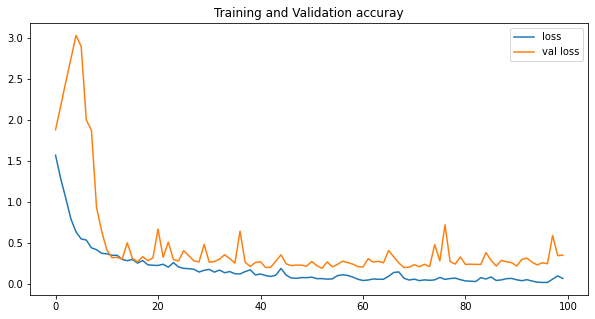

<Figure size 432x288 with 0 Axes>

In [13]:
acc = r.history['accuracy']

#val_acc = r.history['val_accuracy']

loss = r.history['loss']

val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(10,5))

 

#plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

#plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

plt.plot(epochs, loss,'', label = 'loss')

plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()

#Training accuracy 

<Figure size 2520x360 with 0 Axes>

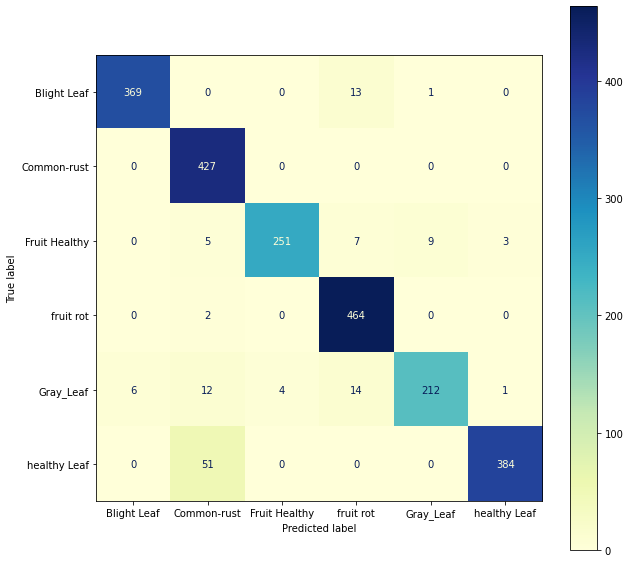

70/70 [==============================] - 1s 10ms/step - loss: 0.1861 - accuracy: 0.9427
Training Accuracy: 0.9427292943000793
Training loss : 0.1860584169626236
[0 3 4 ... 3 0 5]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       383
           1       0.86      1.00      0.92       427
           2       0.98      0.91      0.95       275
           3       0.93      1.00      0.96       466
           4       0.95      0.85      0.90       249
           5       0.99      0.88      0.93       435

    accuracy                           0.94      2235
   macro avg       0.95      0.93      0.94      2235
weighted avg       0.95      0.94      0.94      2235



In [18]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_1.predict([x_train])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_y = np.argmax(y_train,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_y, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_1.evaluate([x_train],y_train)
print('Training Accuracy:', score[1])
print('Training loss :', score[0])

from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_y, round_pred))


#validation accuracy 

<Figure size 2520x360 with 0 Axes>

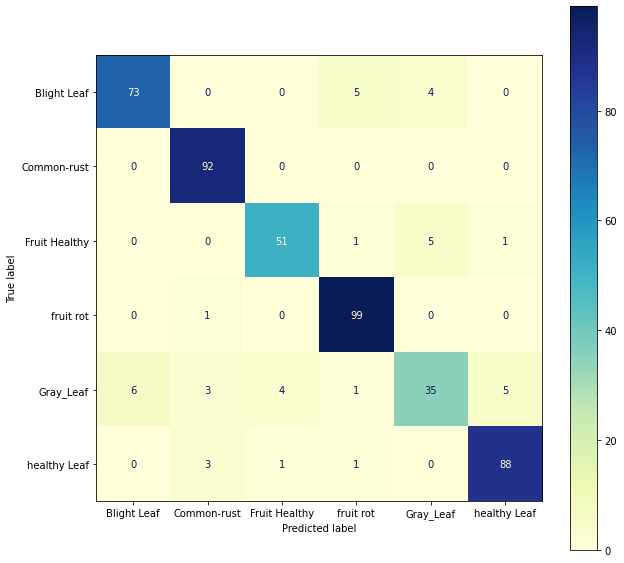

15/15 [==============================] - 0s 12ms/step - loss: 0.3541 - accuracy: 0.9144
Validation Accuracy: 0.9144049882888794
validation loss : 0.35410892963409424
[1 3 1 0 3 5 3 5 0 5 1 3 0 3 3 4 1 3 2 2 3 3 1 1 1 1 5 1 3 3 2 5 1 5 1 1 0
 0 1 5 4 3 1 0 3 0 0 3 0 3 5 5 3 3 2 0 2 5 1 2 1 0 1 5 4 5 5 3 0 0 1 5 5 0
 4 1 3 2 5 4 5 3 3 5 3 3 5 5 1 2 3 3 3 1 1 4 3 0 2 5 2 2 3 3 3 3 4 1 2 5 3
 0 1 2 5 0 5 0 5 3 1 5 2 1 5 5 5 3 5 1 0 2 0 0 4 2 5 5 4 1 3 3 5 4 3 4 4 3
 5 5 3 2 5 5 0 2 2 2 5 3 2 5 5 4 1 2 5 1 3 5 1 5 4 5 0 0 0 1 1 5 5 1 5 1 0
 4 0 5 3 1 3 5 5 3 0 5 1 0 0 1 5 4 3 2 5 4 0 3 2 0 3 1 3 5 5 3 0 1 0 5 5 1
 1 0 0 0 1 3 5 1 4 3 1 2 2 1 2 3 4 2 1 5 4 3 2 0 3 3 4 0 3 3 3 3 3 1 0 2 5
 5 0 3 5 3 3 0 3 1 2 3 2 1 1 2 0 5 3 1 3 1 3 0 1 3 4 3 1 1 2 4 2 1 5 3 5 3
 1 0 3 4 3 0 3 5 0 3 5 0 1 2 0 3 2 0 5 5 2 5 4 4 3 2 3 0 0 4 3 0 5 3 2 1 0
 3 1 1 1 1 5 3 0 2 2 4 2 3 4 0 0 3 1 1 5 1 0 1 1 1 3 3 3 2 3 2 4 0 1 4 0 0
 1 5 3 2 1 4 0 1 3 2 3 1 5 0 3 5 4 3 5 1 0 1 3 0 3 0 5 5 1 5 3 4 5 4 2 0 0
 0 0 5 3 

In [23]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_1.predict([x_validation])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_x = np.argmax(y_validation,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_x, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_1.evaluate([x_validation],y_validation)
print('Validation Accuracy:', score[1]) 
print('validation loss :', score[0])

from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_x, round_pred))

#Testing accuracy

<Figure size 2520x360 with 0 Axes>

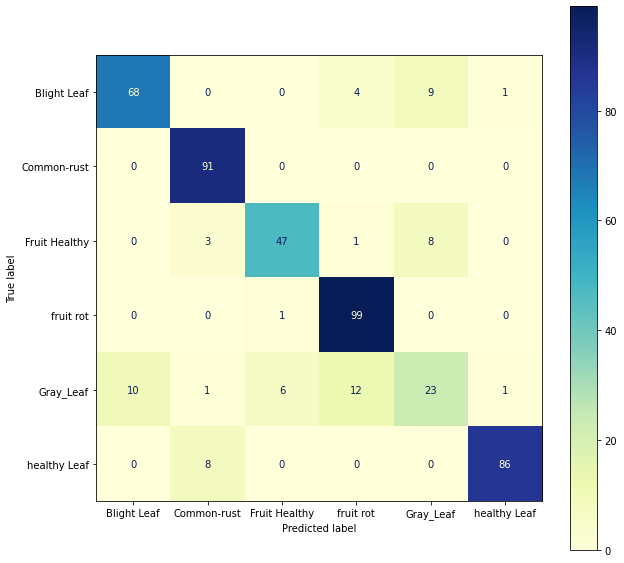

15/15 [==============================] - 0s 15ms/step - loss: 0.6484 - accuracy: 0.8643
Test Accuracy: 0.8643006086349487
Test loss : 0.6483784914016724
[1 4 5 1 5 2 5 5 5 5 1 1 5 0 3 0 0 1 4 1 3 1 2 0 2 0 0 1 0 3 4 3 2 3 3 5 2
 3 4 2 5 5 5 2 3 1 2 5 5 1 5 0 0 5 1 0 3 3 3 3 0 5 0 5 5 1 4 1 5 2 2 3 2 1
 3 4 3 1 2 0 4 5 1 1 0 4 1 4 0 0 0 3 3 5 1 3 5 5 1 3 0 1 0 5 4 3 3 0 2 5 4
 1 3 3 5 4 1 4 1 2 4 1 3 5 1 5 2 0 3 4 1 5 3 0 4 3 2 0 3 4 4 2 3 3 3 3 3 0
 1 5 3 3 1 1 2 3 1 1 0 2 1 3 4 1 3 3 2 2 1 0 1 5 5 0 0 1 0 2 3 5 1 5 1 5 2
 3 1 3 1 3 5 0 0 1 5 4 0 3 1 5 2 3 1 1 1 5 3 4 5 2 2 4 5 3 5 3 3 2 0 1 0 3
 3 0 3 3 3 1 5 1 5 3 3 2 1 4 3 5 0 2 4 0 3 3 1 3 3 0 3 1 5 5 0 1 1 0 5 0 2
 4 3 3 3 3 1 3 5 2 2 5 3 2 3 5 3 4 2 5 5 0 5 5 3 2 5 0 0 1 5 5 2 1 3 4 5 0
 3 3 1 3 5 1 3 0 1 5 3 3 1 1 2 3 1 1 5 3 4 0 3 0 1 0 5 2 1 1 5 1 2 0 1 5 2
 1 1 1 5 1 0 1 4 3 2 0 5 1 4 2 0 5 1 5 4 0 0 3 0 3 3 0 1 3 3 0 5 4 5 0 3 5
 5 4 5 2 4 3 3 1 1 4 1 1 3 1 1 5 0 3 5 5 2 5 3 0 3 1 5 5 0 0 1 1 3 1 1 4 3
 2 1 0 2 0 5 3 3 0 0 1

In [25]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_1.predict([x_test])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_z = np.argmax(y_test,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_z, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_1.evaluate([x_test],y_test)
print('Test Accuracy:', score[1]) 
print('Test loss :', score[0])

from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_z,round_pred))

#AlexNet proposed model

In [89]:
# (3) Create a sequential model
model_2 = Sequential()


# 1st Convolutional Layer
model_2.add(Conv2D(filters=3, input_shape=(128,128,3), kernel_size=(3,3),\
 strides=(4,4), padding='same'))
model_2.add(Activation('relu'))
# Pooling 
model_2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation before passing it to the next layer
model_2.add(BatchNormalization())


# 2nd Convolutional Layer
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(Activation('relu'))
# Pooling
model_2.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model_2.add(BatchNormalization())


# 3rd Convolutional Layer
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'))
model_2.add(Activation('relu'))
# Batch Normalisation
model_2.add(BatchNormalization())


# 4th Convolutional Layer
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(Activation('relu'))
# Batch Normalisation
model_2.add(BatchNormalization())


# Add Dropout to prevent overfitting
#model_2.add(Dropout(0.4))
# Batch Normalisation
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(2,2))
model_2.add(Dense(50,activation='relu',kernel_initializer='he_uniform'))

#  output Layer 
model_2.add(Flatten())
model_2.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(6,activation='softmax'))

model_2.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_162 (Conv2D)         (None, 32, 32, 3)         84        
                                                                 
 activation_88 (Activation)  (None, 32, 32, 3)         0         
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 16, 16, 3)        0         
 g2D)                                                            
                                                                 
 batch_normalization_115 (Ba  (None, 16, 16, 3)        12        
 tchNormalization)                                               
                                                                 
 conv2d_163 (Conv2D)         (None, 16, 16, 3)         84        
                                                                 
 activation_89 (Activation)  (None, 16, 16, 3)       

In [90]:
# tell the model what cost and optimization method to use
model_2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [91]:
# fit the model
r = model_2.fit(x_train,y_train,epochs=100,validation_data=(x_validation,y_validation))

Epoch 1/100
70/70 [==============================] - 2s 16ms/step - loss: 1.2543 - accuracy: 0.5477 - val_loss: 1.5879 - val_accuracy: 0.2672
Epoch 2/100
70/70 [==============================] - 1s 12ms/step - loss: 0.9046 - accuracy: 0.6631 - val_loss: 1.4530 - val_accuracy: 0.3800
Epoch 3/100
70/70 [==============================] - 1s 11ms/step - loss: 0.8417 - accuracy: 0.6846 - val_loss: 1.0786 - val_accuracy: 0.5762
Epoch 4/100
70/70 [==============================] - 1s 11ms/step - loss: 0.7577 - accuracy: 0.7293 - val_loss: 1.5100 - val_accuracy: 0.3946
Epoch 5/100
70/70 [==============================] - 1s 11ms/step - loss: 0.6404 - accuracy: 0.7727 - val_loss: 1.6200 - val_accuracy: 0.5762
Epoch 6/100
70/70 [==============================] - 1s 11ms/step - loss: 0.6001 - accuracy: 0.7951 - val_loss: 1.0107 - val_accuracy: 0.6764
Epoch 7/100
70/70 [==============================] - 1s 11ms/step - loss: 0.5029 - accuracy: 0.8353 - val_loss: 0.4656 - val_accuracy: 0.8392
Epoch 

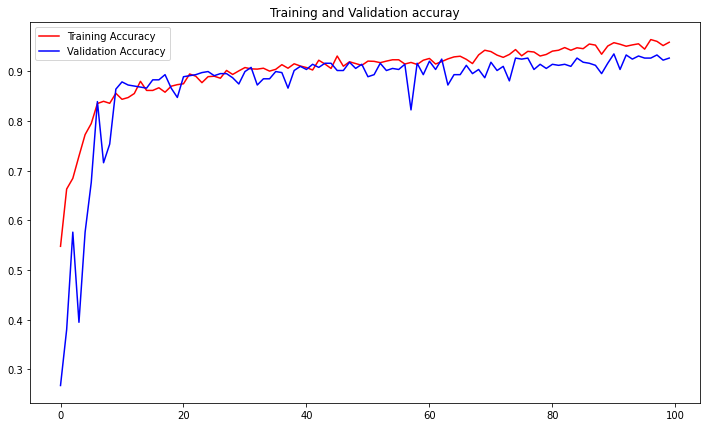

<Figure size 432x288 with 0 Axes>

15/15 [==============================] - 0s 7ms/step - loss: 0.2722 - accuracy: 0.9269
Training Accuracy: 0.9269310832023621
Training  loss : 0.2722266614437103


In [95]:
acc = r.history['accuracy']

val_acc = r.history['val_accuracy']

#loss = r.history['loss']

#val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12,7))

 

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

#plt.plot(epochs, loss,'', label = 'loss')

#plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()
score = model_2.evaluate(x_validation,y_validation)
print('Training Accuracy:', score[1])
print('Training  loss :', score[0])

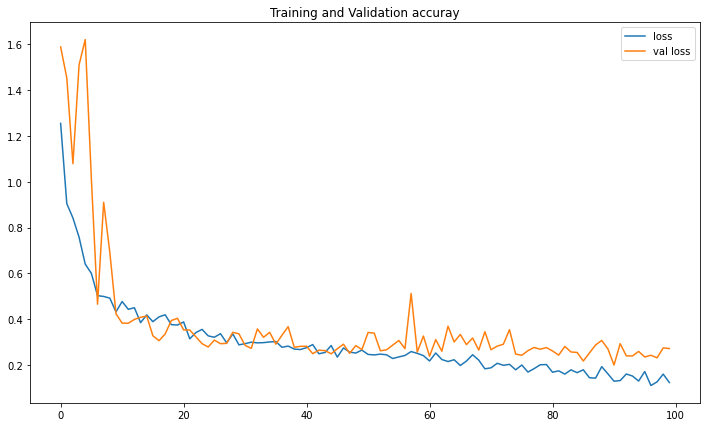

<Figure size 432x288 with 0 Axes>

In [93]:
acc = r.history['accuracy']

#val_acc = r.history['val_accuracy']

loss = r.history['loss']

val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12,7))

 

#plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

#plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

plt.plot(epochs, loss,'', label = 'loss')

plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()

#Training proposed AlexNet

<Figure size 2520x360 with 0 Axes>

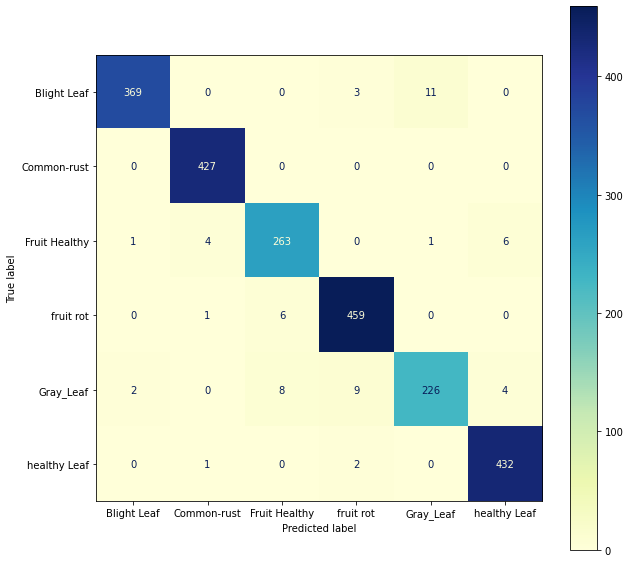

70/70 [==============================] - 1s 7ms/step - loss: 0.0901 - accuracy: 0.9736
Training Accuracy: 0.9736018180847168
Training loss : 0.0900687575340271
[0 3 2 ... 3 0 5]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       383
           1       0.99      1.00      0.99       427
           2       0.95      0.96      0.95       275
           3       0.97      0.98      0.98       466
           4       0.95      0.91      0.93       249
           5       0.98      0.99      0.99       435

    accuracy                           0.97      2235
   macro avg       0.97      0.97      0.97      2235
weighted avg       0.97      0.97      0.97      2235



In [96]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_2.predict([x_train])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_x = np.argmax(y_train,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_x, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_2.evaluate([x_train],y_train)
print('Training Accuracy:', score[1])
print('Training loss :', score[0])


from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_x, round_pred))

#Validation proposed AlexNet

<Figure size 2520x360 with 0 Axes>

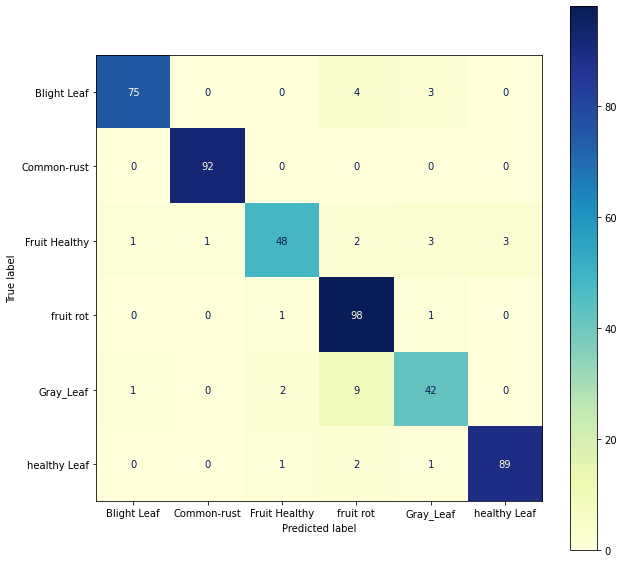

15/15 [==============================] - 0s 7ms/step - loss: 0.2722 - accuracy: 0.9269
Validation Accuracy: 0.9269310832023621
validation loss : 0.2722266614437103
[1 3 1 0 3 5 3 5 0 5 1 3 0 3 3 3 1 3 2 2 3 3 1 1 1 1 5 1 3 3 2 5 3 5 1 5 0
 0 1 5 4 3 1 0 3 0 0 3 0 3 5 5 3 3 2 0 2 5 1 2 1 0 1 2 4 5 5 3 0 0 1 5 5 0
 4 1 3 2 5 4 4 3 3 5 0 3 5 5 1 2 3 3 3 1 1 0 3 0 2 5 2 3 3 3 3 3 3 1 2 5 3
 0 1 2 5 0 5 3 5 3 1 5 4 1 5 5 5 3 5 1 0 2 0 0 4 2 5 5 4 1 3 3 5 0 3 2 4 3
 5 5 3 2 5 5 0 2 2 4 5 3 2 5 5 4 1 2 5 1 3 5 1 5 4 4 4 0 0 1 1 5 5 1 5 1 0
 4 3 5 3 1 3 5 5 3 0 4 1 0 0 1 5 4 3 2 5 3 0 3 2 0 3 1 3 5 5 3 0 1 0 5 5 1
 5 4 0 0 1 3 5 1 4 3 1 2 2 1 2 4 4 2 1 5 4 4 2 0 3 3 4 4 3 3 3 3 3 1 0 2 5
 5 0 3 5 3 3 0 3 1 2 3 2 1 1 2 0 5 3 1 3 1 3 0 1 3 0 3 1 1 2 4 3 1 5 3 5 3
 1 0 3 4 3 0 3 5 0 3 4 0 1 2 0 3 2 0 5 5 2 5 4 4 2 4 3 0 0 0 3 0 4 3 2 1 0
 3 1 1 1 1 5 3 0 2 2 2 2 3 4 0 0 3 1 1 5 1 0 4 1 1 3 3 3 2 3 2 4 0 1 4 0 0
 1 5 3 2 1 3 0 1 3 5 3 4 5 0 0 5 4 3 5 1 0 1 3 4 3 4 5 5 1 4 4 3 5 4 2 0 0
 0 3 5 3 5 

In [97]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_2.predict([x_validation])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_y = np.argmax(y_validation,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_y, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_2.evaluate([x_validation],y_validation)
print('Validation Accuracy:', score[1]) 
print('validation loss :', score[0])

from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_y, round_pred))

#Testing proposed AlexNet

<Figure size 2520x360 with 0 Axes>

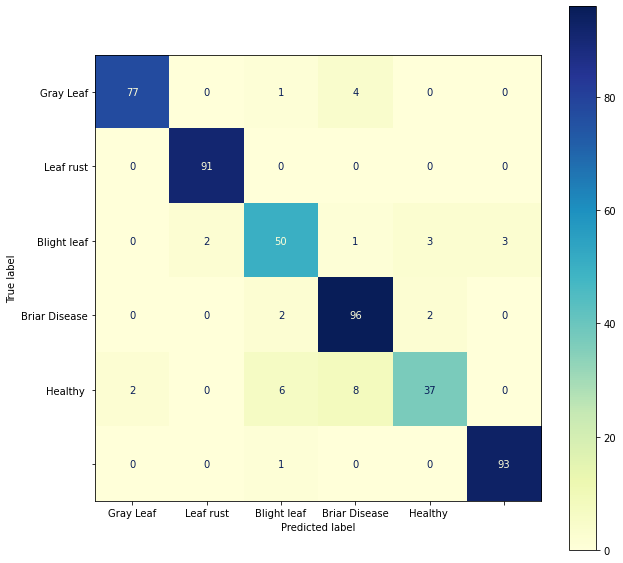

15/15 [==============================] - 0s 7ms/step - loss: 0.2550 - accuracy: 0.9269
Test Accuracy: 0.9269310832023621
Test loss : 0.25499892234802246


In [98]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_2.predict([x_test])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_z = np.argmax(y_test,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_z, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Gray Leaf','Leaf rust','Blight leaf','Briar Disease','Healthy '])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_2.evaluate([x_test],y_test)
print('Test Accuracy:', score[1]) 
print('Test loss :', score[0])

#concatnation for VGG16$AlexNet

In [99]:
from keras.layers.merge import concatenate
x1 =  model_1.get_layer('dense_10').output
x2 = model_2.get_layer('dense_67').output
x1 = Flatten()(x1)
x2 = Flatten()(x2)
out = concatenate([x1,x2])
out = Dense(6,activation='softmax')(out)
conc_model = Model(inputs = ([model_1.input,model_2.input]),outputs = out)
conc_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_162_input (InputLayer)  [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_162 (Conv2D)            (None, 32, 32, 3)    84          ['conv2d_162_input[0][0]']       
                                                                                                  
 conv2d_26_input (InputLayer)   [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                            

In [100]:
# tell the model what cost and optimization method to use
conc_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [101]:
# fit the model
r = conc_model.fit([x_train,x_train],y_train,epochs=100,validation_data=([x_validation,x_validation],y_validation))

Epoch 1/100
70/70 [==============================] - 6s 61ms/step - loss: 1.7052 - accuracy: 0.3065 - val_loss: 1.6942 - val_accuracy: 0.2630
Epoch 2/100
70/70 [==============================] - 3s 48ms/step - loss: 1.5262 - accuracy: 0.3848 - val_loss: 1.5974 - val_accuracy: 0.2171
Epoch 3/100
70/70 [==============================] - 4s 50ms/step - loss: 1.4097 - accuracy: 0.5463 - val_loss: 1.4585 - val_accuracy: 0.5157
Epoch 4/100
70/70 [==============================] - 4s 51ms/step - loss: 1.3061 - accuracy: 0.6899 - val_loss: 1.3564 - val_accuracy: 0.4280
Epoch 5/100
70/70 [==============================] - 4s 51ms/step - loss: 1.2368 - accuracy: 0.7083 - val_loss: 1.3674 - val_accuracy: 0.6931
Epoch 6/100
70/70 [==============================] - 4s 52ms/step - loss: 1.2193 - accuracy: 0.6349 - val_loss: 1.2718 - val_accuracy: 0.6660
Epoch 7/100
70/70 [==============================] - 3s 46ms/step - loss: 1.1410 - accuracy: 0.7262 - val_loss: 1.1512 - val_accuracy: 0.7077
Epoch 

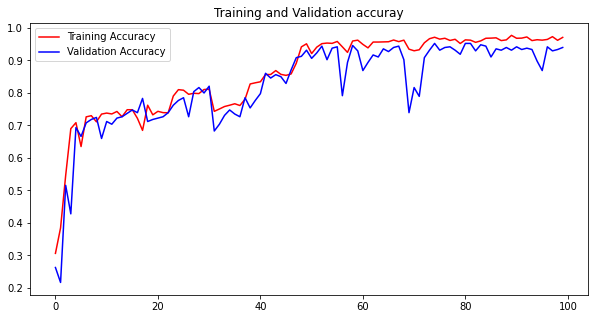

<Figure size 2160x1080 with 0 Axes>

In [102]:
acc = r.history['accuracy']

val_acc = r.history['val_accuracy']

#loss = r.history['loss']

#val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,5))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

#plt.plot(epochs, loss,'', label = 'loss')

#plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure(figsize=(30,15))

#show the graph

plt.show()
#score = conc_model.evaluate(x_validation,y_validation)
#print('Training Accuracy:', score[1])
#print('Testing loss :', score[0])

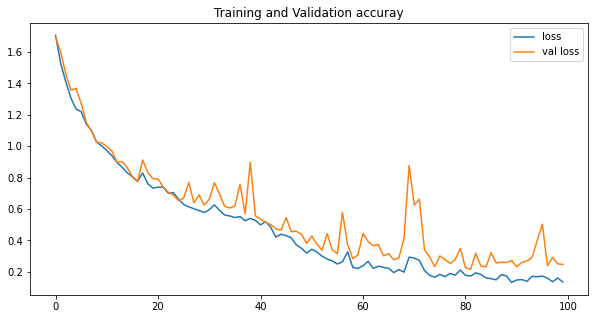

<Figure size 432x288 with 0 Axes>

In [103]:
acc = r.history['accuracy']

#val_acc = r.history['val_accuracy']

loss = r.history['loss']

val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(10,5))

 

#plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

#plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

plt.plot(epochs, loss,'', label = 'loss')

plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()

<Figure size 2520x360 with 0 Axes>

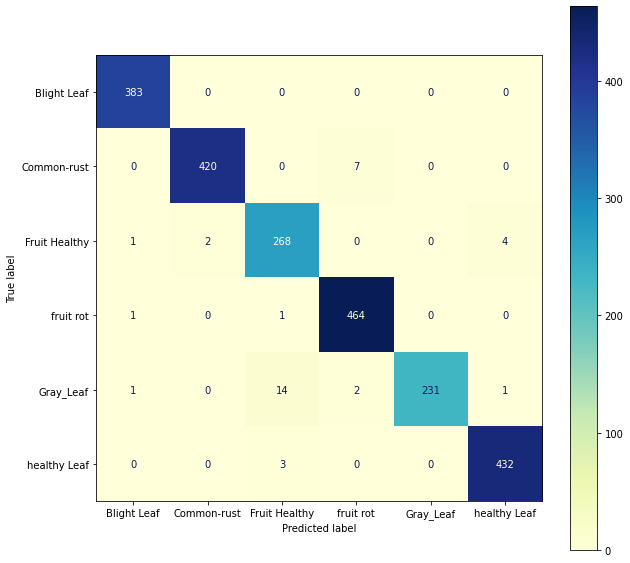

70/70 [==============================] - 1s 16ms/step - loss: 0.0972 - accuracy: 0.9834
Testing loss : 0.09722107648849487
Training Accuracy: 0.9834451675415039
[0 3 2 ... 3 0 5]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       383
           1       1.00      0.98      0.99       427
           2       0.94      0.97      0.96       275
           3       0.98      1.00      0.99       466
           4       1.00      0.93      0.96       249
           5       0.99      0.99      0.99       435

    accuracy                           0.98      2235
   macro avg       0.98      0.98      0.98      2235
weighted avg       0.98      0.98      0.98      2235



In [104]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_train,x_train])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_x = np.argmax(y_train,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_x, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_train,x_train],y_train)
print('Testing loss :', score[0])
print('Training Accuracy:', score[1]) 


from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_x, round_pred))

<Figure size 2520x360 with 0 Axes>

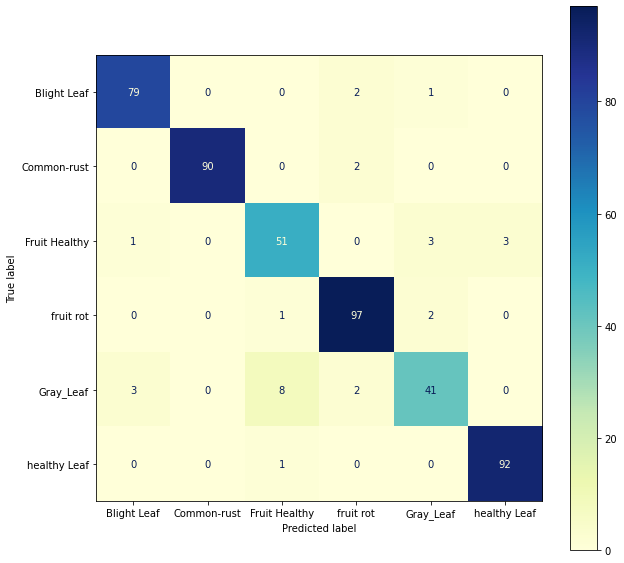

15/15 [==============================] - 0s 16ms/step - loss: 0.2476 - accuracy: 0.9395
Validation Accuracy: 0.9394571781158447
validation loss : 0.24764852225780487
[1 3 1 0 3 5 3 5 0 5 1 3 0 3 3 4 1 3 2 2 3 3 1 1 1 1 5 1 3 3 2 5 3 5 1 5 0
 0 1 5 4 3 1 0 3 0 0 3 0 3 5 5 3 4 2 0 2 5 1 2 1 0 1 5 4 5 5 3 0 0 1 5 5 0
 4 1 3 2 5 4 5 3 3 5 0 3 5 5 1 2 3 3 3 1 1 0 3 0 2 5 2 2 3 3 3 3 4 1 2 5 3
 0 1 2 5 0 5 0 5 3 1 5 4 1 5 5 5 3 5 1 0 2 0 0 4 2 5 5 4 1 3 3 5 0 3 2 4 3
 5 5 3 2 5 5 0 2 2 4 5 3 2 5 5 4 1 2 5 1 3 5 1 5 4 4 3 0 0 1 1 5 5 1 5 1 0
 4 4 5 3 1 3 5 5 3 0 4 1 0 0 1 5 4 3 2 5 0 0 3 2 0 0 1 3 5 5 3 0 1 0 5 5 1
 5 4 0 0 1 3 5 1 2 3 1 2 2 3 2 4 4 2 1 5 4 4 2 0 3 3 4 2 3 3 3 3 3 1 0 2 5
 5 0 3 5 3 3 0 3 1 2 3 2 1 1 2 0 5 3 1 3 1 3 0 1 3 0 3 3 1 2 4 5 1 5 2 5 3
 1 0 3 4 3 0 3 5 0 3 4 0 1 2 0 3 2 0 5 5 2 5 4 4 2 4 3 0 0 0 3 0 4 3 2 1 0
 3 1 1 1 1 5 3 0 2 2 2 2 3 0 0 0 3 1 1 5 1 0 4 1 1 3 3 3 2 3 2 4 0 1 4 0 0
 1 5 3 2 1 2 0 1 3 5 3 4 5 0 0 5 4 2 5 1 0 1 3 4 3 4 5 5 1 4 4 2 5 4 2 0 0
 0 3 5 3 

In [105]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_validation,x_validation])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_y = np.argmax(y_validation,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_y, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_validation,x_validation],y_validation)
print('Validation Accuracy:', score[1]) 
print('validation loss :', score[0])


from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_y, round_pred))

<Figure size 2520x360 with 0 Axes>

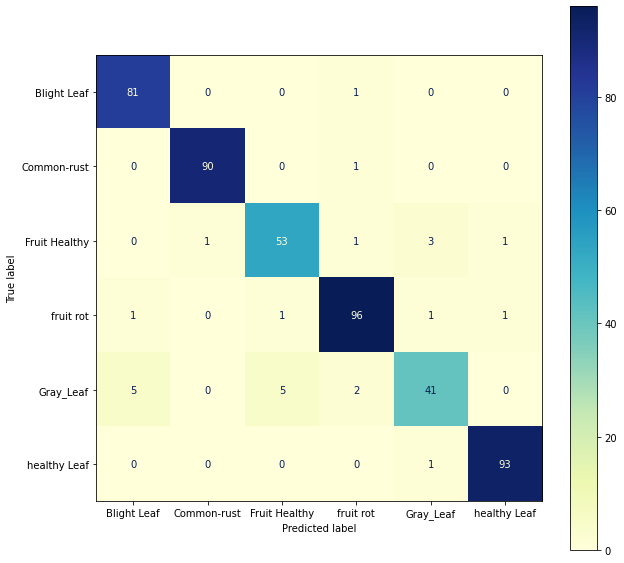

15/15 [==============================] - 0s 16ms/step - loss: 0.2418 - accuracy: 0.9478
Test Accuracy: 0.9478079080581665
Test loss : 0.24177153408527374
[1 2 5 1 5 2 5 5 5 5 1 1 5 0 3 0 0 1 2 1 3 1 2 0 2 0 4 1 0 3 2 3 2 3 3 5 2
 4 0 2 5 5 5 2 4 1 2 5 0 1 5 4 0 5 1 0 3 0 3 3 4 5 0 5 5 1 0 1 5 2 2 3 2 1
 3 2 3 5 2 0 0 5 1 1 0 0 1 0 4 0 0 3 3 5 1 3 5 5 1 3 4 1 0 5 2 3 3 0 2 5 2
 1 3 3 5 4 1 4 1 2 4 1 3 5 1 5 2 0 3 4 5 5 3 4 4 3 2 0 3 4 4 2 3 3 3 3 3 0
 1 5 3 4 1 1 2 3 1 1 0 2 1 3 4 1 3 3 4 2 1 0 5 5 5 0 0 1 0 2 3 5 1 5 1 5 2
 3 1 3 1 3 5 0 0 1 5 4 0 3 1 5 2 3 4 1 1 5 3 2 5 2 2 4 5 4 5 3 3 4 0 2 0 0
 3 0 3 3 3 1 5 1 5 3 3 2 5 4 4 5 4 2 0 0 3 3 1 3 3 0 3 1 5 5 0 1 1 0 5 0 2
 0 3 3 3 3 1 5 5 2 2 5 3 2 3 5 3 4 2 5 4 0 5 5 3 2 5 0 0 1 5 5 2 1 3 4 5 0
 3 3 1 3 5 1 3 0 1 5 3 4 1 1 2 3 1 1 5 3 4 0 3 0 1 0 5 2 1 1 5 5 3 0 1 5 4
 1 1 5 5 1 0 1 0 3 2 0 4 1 4 2 0 5 1 5 4 0 0 3 0 3 4 0 1 3 0 0 5 4 5 0 3 5
 5 2 5 2 2 3 3 1 1 4 1 1 3 1 1 5 0 0 5 5 4 5 3 0 3 1 5 5 0 0 1 2 3 1 5 0 3
 4 1 0 2 0 5 2 3 0 4 

In [106]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_test,x_test])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_z = np.argmax(y_test,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_z, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_test,x_test],y_test)
print('Test Accuracy:', score[1]) 
print('Test loss :', score[0])


from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_z, round_pred))

In [15]:
# fit the model
r = conc_model.fit([x_train,x_train],y_train,epochs=100,validation_data=([x_validation,x_validation],y_validation))

Epoch 1/100
70/70 [==============================] - 9s 73ms/step - loss: 1.6248 - accuracy: 0.4819 - val_loss: 1.7773 - val_accuracy: 0.1942
Epoch 2/100
70/70 [==============================] - 3s 43ms/step - loss: 1.3476 - accuracy: 0.7535 - val_loss: 1.7839 - val_accuracy: 0.1942
Epoch 3/100
70/70 [==============================] - 3s 43ms/step - loss: 1.1630 - accuracy: 0.8076 - val_loss: 1.8036 - val_accuracy: 0.1983
Epoch 4/100
70/70 [==============================] - 3s 43ms/step - loss: 1.0059 - accuracy: 0.8541 - val_loss: 1.7516 - val_accuracy: 0.2463
Epoch 5/100
70/70 [==============================] - 3s 43ms/step - loss: 0.9075 - accuracy: 0.8586 - val_loss: 1.5668 - val_accuracy: 0.3382
Epoch 6/100
70/70 [==============================] - 3s 44ms/step - loss: 0.8125 - accuracy: 0.8738 - val_loss: 1.3989 - val_accuracy: 0.4509
Epoch 7/100
70/70 [==============================] - 3s 43ms/step - loss: 0.7355 - accuracy: 0.8787 - val_loss: 0.9197 - val_accuracy: 0.7599
Epoch 

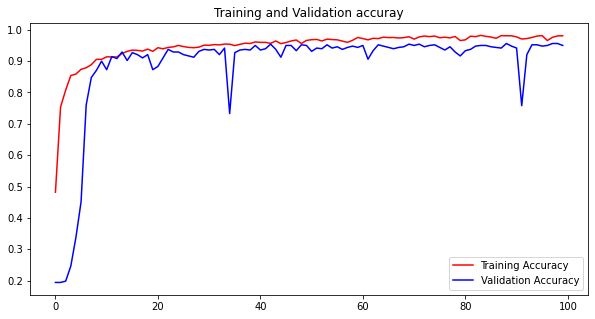

<Figure size 2160x1080 with 0 Axes>

In [19]:
acc = r.history['accuracy']

val_acc = r.history['val_accuracy']

#loss = r.history['loss']

#val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,5))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

#plt.plot(epochs, loss,'', label = 'loss')

#plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure(figsize=(30,15))

#show the graph

plt.show()
#score = conc_model.evaluate(x_validation,y_validation)
#print('Training Accuracy:', score[1])
#print('Testing loss :', score[0])

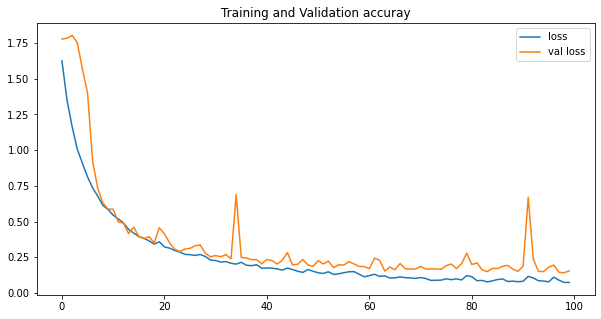

<Figure size 432x288 with 0 Axes>

In [17]:
acc = r.history['accuracy']

#val_acc = r.history['val_accuracy']

loss = r.history['loss']

val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(10,5))

 

#plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

#plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

plt.plot(epochs, loss,'', label = 'loss')

plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()

#concatnation proposed for VGG16$AlexNet Training

<Figure size 2520x360 with 0 Axes>

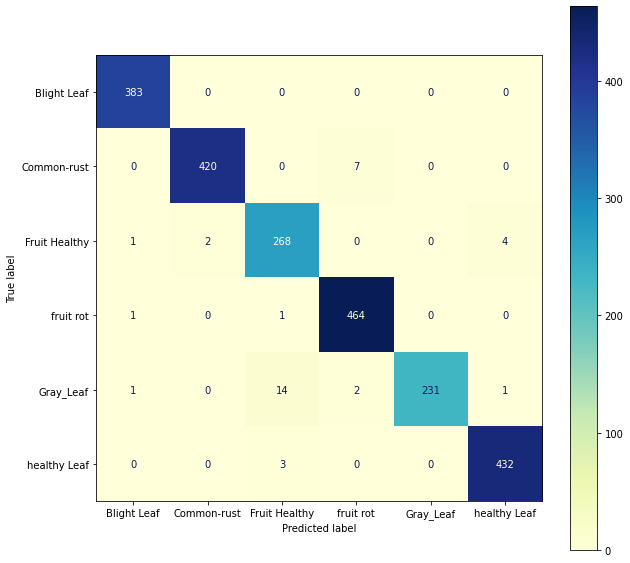

70/70 [==============================] - 1s 15ms/step - loss: 0.0972 - accuracy: 0.9834
Training Accuracy: 0.9834451675415039
Training loss : 0.09722107648849487
[0 3 2 ... 3 0 5]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       383
           1       1.00      0.98      0.99       427
           2       0.94      0.97      0.96       275
           3       0.98      1.00      0.99       466
           4       1.00      0.93      0.96       249
           5       0.99      0.99      0.99       435

    accuracy                           0.98      2235
   macro avg       0.98      0.98      0.98      2235
weighted avg       0.98      0.98      0.98      2235



In [107]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_train,x_train])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_x = np.argmax(y_train,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_x, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_train,x_train],y_train)
print('Training Accuracy:', score[1]) 
print('Training loss :', score[0])


from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_x, round_pred))

#concatnation proposed for VGG16$AlexNet Validation

<Figure size 2520x360 with 0 Axes>

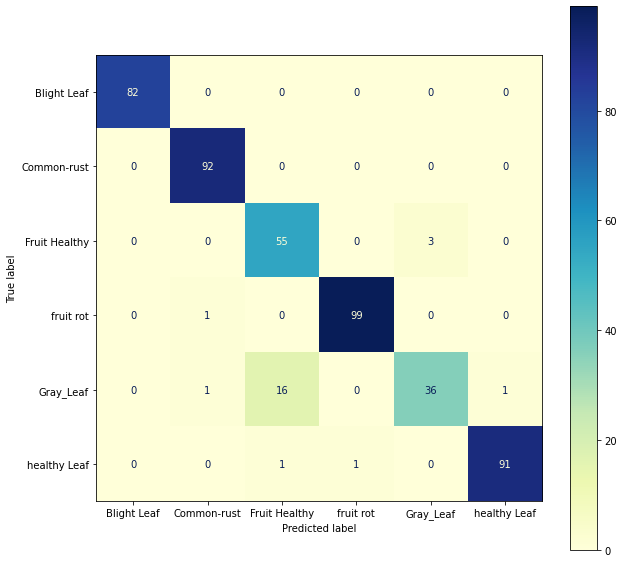

15/15 [==============================] - 0s 19ms/step - loss: 0.1545 - accuracy: 0.9499
Validation Accuracy: 0.9498956203460693
validation loss : 0.1544506698846817
[1 3 1 0 3 5 3 2 0 2 1 3 0 3 3 4 1 3 2 2 3 3 1 1 1 1 5 1 3 3 2 5 3 5 1 5 0
 0 1 5 2 3 1 0 3 0 0 3 0 3 5 5 3 3 2 0 2 5 1 2 1 0 1 5 4 5 5 3 0 0 1 5 5 0
 4 1 3 2 5 2 5 3 3 5 0 3 5 5 1 2 3 3 3 1 1 0 3 0 2 5 2 2 3 3 3 3 1 1 2 5 3
 0 1 2 5 0 5 0 5 3 1 5 4 1 5 5 5 3 5 1 0 2 0 0 4 2 5 5 4 1 3 3 5 0 3 2 2 3
 5 5 3 2 5 5 0 2 2 2 5 3 2 5 5 4 1 2 5 1 3 5 1 5 4 4 0 0 0 1 1 5 5 1 5 1 0
 2 4 5 3 1 3 5 5 3 0 2 1 0 0 1 5 2 3 2 5 4 0 3 2 0 0 1 3 5 5 3 0 1 0 5 5 1
 5 4 0 0 1 3 5 1 4 3 1 2 2 1 2 4 2 2 1 5 4 0 2 0 3 3 4 4 3 3 3 3 3 1 0 2 5
 5 4 3 5 3 3 0 3 1 2 3 2 1 1 2 0 5 3 1 3 1 3 0 1 3 0 3 1 1 2 4 3 1 5 5 5 3
 1 0 3 4 3 0 3 5 0 3 2 0 1 2 0 3 2 0 5 5 2 5 4 4 2 4 3 0 0 0 3 0 4 3 2 1 0
 3 1 1 1 1 5 3 0 2 2 2 2 3 4 0 0 3 1 1 5 1 0 5 1 1 3 3 3 2 3 2 4 0 1 4 0 0
 1 5 3 4 1 4 0 1 3 2 3 4 5 0 0 5 2 3 5 1 0 1 3 4 3 2 5 5 1 4 1 2 5 4 2 0 0
 0 0 5 3 5

In [29]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_validation,x_validation])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_y = np.argmax(y_validation,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_y, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_validation,x_validation],y_validation)
print('Validation Accuracy:', score[1]) 
print('validation loss :', score[0])


from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_y, round_pred))

#concatnation proposed for VGG16$AlexNet Testing 

<Figure size 2520x360 with 0 Axes>

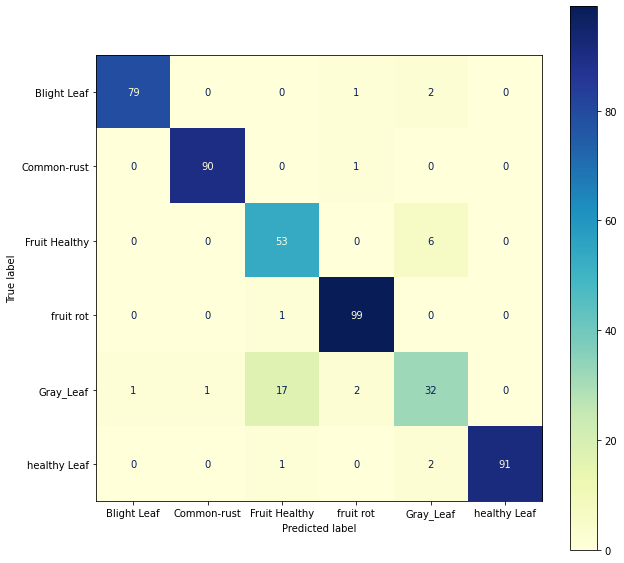

15/15 [==============================] - 0s 16ms/step - loss: 0.2257 - accuracy: 0.9269
Test Accuracy: 0.9269310832023621
Test loss : 0.22570130228996277
[1 2 5 1 5 2 4 5 5 5 1 1 5 0 3 0 0 1 2 1 3 1 2 0 2 0 4 1 0 3 2 3 2 3 3 5 2
 4 4 2 5 5 5 2 4 1 2 5 0 1 5 2 0 5 1 0 3 1 3 3 4 5 0 5 5 1 0 2 5 4 2 3 2 1
 0 2 3 5 2 0 0 5 1 1 0 0 1 4 4 0 0 3 3 5 1 3 5 5 1 3 4 1 0 5 2 3 3 0 2 5 4
 1 3 3 5 2 1 4 1 2 2 1 3 5 1 5 2 0 3 4 5 5 3 2 4 3 2 0 3 4 4 2 3 3 3 2 3 0
 1 5 3 4 1 1 2 3 1 1 0 2 1 3 2 1 3 3 2 2 1 0 5 5 5 0 0 1 0 2 3 5 1 5 1 5 2
 3 1 3 1 3 5 0 0 1 5 4 0 2 1 5 2 3 2 1 1 5 3 4 5 2 2 4 5 2 5 3 3 4 0 4 0 0
 3 0 3 3 3 1 5 1 5 3 3 2 5 4 4 5 4 2 0 0 2 3 1 3 3 0 3 1 5 5 0 1 1 0 5 0 2
 0 3 3 3 3 1 3 5 2 2 5 3 2 3 5 3 2 2 5 2 0 5 5 3 2 5 0 0 1 5 5 2 1 3 4 5 4
 3 3 1 3 5 1 3 0 1 5 3 4 1 1 2 3 1 1 5 3 4 0 3 4 1 4 5 2 1 1 5 5 3 0 1 5 4
 1 1 5 5 1 0 3 0 3 2 0 4 1 4 2 0 5 1 5 4 0 0 3 0 3 4 0 1 3 0 0 5 4 4 0 3 5
 5 4 5 2 2 3 3 1 1 4 1 1 3 1 1 5 0 3 5 5 2 5 3 0 3 1 5 5 0 0 1 2 3 1 5 0 3
 2 1 0 2 0 5 3 3 0 4 

In [31]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_test,x_test])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_z = np.argmax(y_test,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_z, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_test,x_test],y_test)
print('Test Accuracy:', score[1]) 
print('Test loss :', score[0])


from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_z, round_pred))

#Deep learning

In [11]:
kernel_initializer = 'he_uniform' #good for relu activation func
conc_model = Sequential()
conc_model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape = (128,128,3)))
conc_model.add(MaxPooling2D(2,2))

conc_model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
conc_model.add(MaxPooling2D(2,2))

conc_model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
conc_model.add(MaxPooling2D(2,2))

conc_model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
conc_model.add(MaxPooling2D(2,2))
conc_model.add(Dropout(0.15))

conc_model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
conc_model.add(MaxPooling2D(2,2))
conc_model.add(Dropout(0.25))

conc_model.add(Flatten())
conc_model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
conc_model.add(Dense(6,activation='softmax'))
conc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [12]:
# tell the model what cost and optimization method to use
conc_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# fit the model
r = conc_model.fit(x_train,y_train,epochs=100,validation_data=(x_validation,y_validation))

Epoch 1/100
70/70 [==============================] - 81s 1s/step - loss: 1.0089 - accuracy: 0.6331 - val_loss: 0.3347 - val_accuracy: 0.9102
Epoch 2/100
70/70 [==============================] - 80s 1s/step - loss: 0.3358 - accuracy: 0.8940 - val_loss: 0.1888 - val_accuracy: 0.9290
Epoch 3/100
70/70 [==============================] - 81s 1s/step - loss: 0.2198 - accuracy: 0.9338 - val_loss: 0.1796 - val_accuracy: 0.9353
Epoch 4/100
70/70 [==============================] - 82s 1s/step - loss: 0.1751 - accuracy: 0.9450 - val_loss: 0.1232 - val_accuracy: 0.9624
Epoch 5/100
70/70 [==============================] - 80s 1s/step - loss: 0.1654 - accuracy: 0.9459 - val_loss: 0.1482 - val_accuracy: 0.9415
Epoch 6/100
70/70 [==============================] - 79s 1s/step - loss: 0.1129 - accuracy: 0.9647 - val_loss: 0.1223 - val_accuracy: 0.9582
Epoch 7/100
70/70 [==============================] - 81s 1s/step - loss: 0.1189 - accuracy: 0.9597 - val_loss: 0.0896 - val_accuracy: 0.9708
Epoch 8/100
7

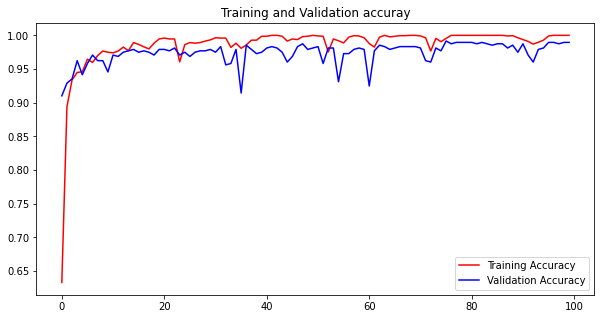

<Figure size 2160x1080 with 0 Axes>

In [14]:
acc = r.history['accuracy']

val_acc = r.history['val_accuracy']

#loss = r.history['loss']

#val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,5))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

#plt.plot(epochs, loss,'', label = 'loss')

#plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure(figsize=(30,15))

#show the graph

plt.show()
#score = conc_model.evaluate(x_validation,y_validation)
#print('Training Accuracy:', score[1])
#print('Testing loss :', score[0])

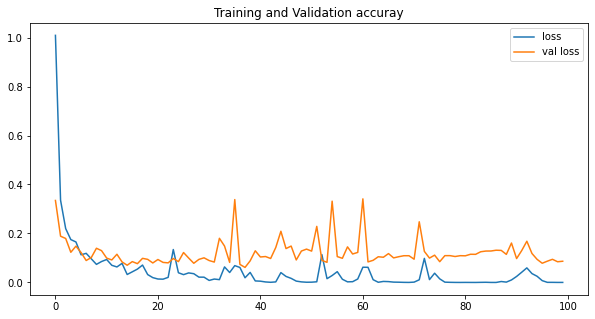

<Figure size 432x288 with 0 Axes>

In [15]:
acc = r.history['accuracy']

#val_acc = r.history['val_accuracy']

loss = r.history['loss']

val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(10,5))

 

#plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

#plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

plt.plot(epochs, loss,'', label = 'loss')

plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()

<Figure size 2520x360 with 0 Axes>

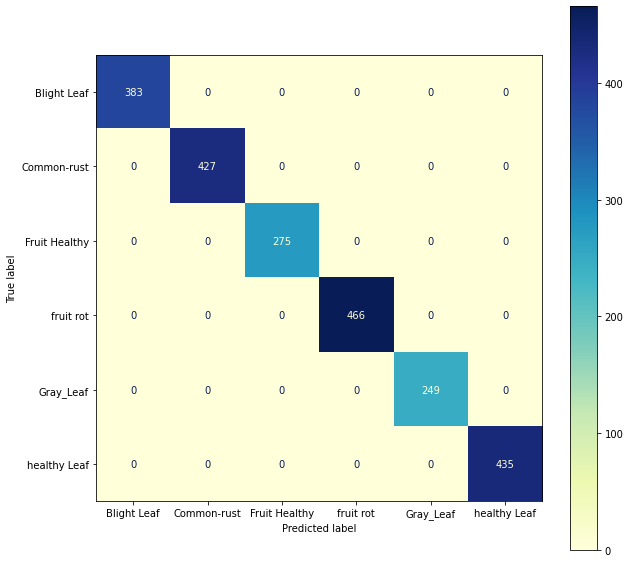

70/70 [==============================] - 19s 266ms/step - loss: 6.9686e-05 - accuracy: 1.0000
Training Accuracy: 1.0
Training loss : 6.968584057176486e-05
[0 3 2 ... 3 0 5]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       383
           1       1.00      1.00      1.00       427
           2       1.00      1.00      1.00       275
           3       1.00      1.00      1.00       466
           4       1.00      1.00      1.00       249
           5       1.00      1.00      1.00       435

    accuracy                           1.00      2235
   macro avg       1.00      1.00      1.00      2235
weighted avg       1.00      1.00      1.00      2235



In [17]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_train])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_x = np.argmax(y_train,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_x, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_train],y_train)
print('Training Accuracy:', score[1])
print('Training loss :', score[0])

from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_x, round_pred))

<Figure size 2520x360 with 0 Axes>

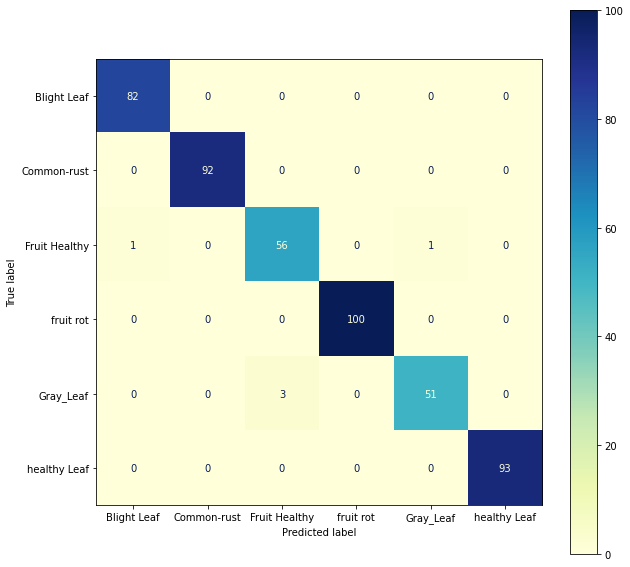

15/15 [==============================] - 4s 267ms/step - loss: 0.0867 - accuracy: 0.9896
Validation Accuracy: 0.9895615577697754
validation loss : 0.08666041493415833
[1 3 1 0 3 5 3 2 0 5 1 3 0 3 3 2 1 3 2 2 3 3 1 1 1 1 5 1 3 3 2 5 3 5 1 5 0
 0 1 5 4 3 1 0 3 0 0 3 0 3 5 5 3 3 2 0 2 5 1 2 1 0 1 5 4 5 5 3 0 0 1 5 5 0
 4 1 3 2 5 4 5 3 3 5 0 3 5 5 1 2 3 3 3 1 1 0 3 0 2 5 2 2 3 3 3 3 4 1 2 5 3
 0 1 2 5 0 5 0 5 3 1 5 4 1 5 5 5 3 5 1 0 2 0 0 4 2 5 5 4 1 3 3 5 0 3 4 4 3
 5 5 3 2 5 5 0 2 2 2 5 3 2 5 5 4 1 2 5 1 3 5 1 5 4 4 0 0 0 1 1 5 5 1 5 1 0
 4 4 5 3 1 3 5 5 3 0 4 1 0 0 1 5 4 3 2 5 4 0 3 2 0 0 1 3 5 5 3 0 1 0 5 5 1
 5 4 0 0 1 3 5 1 4 3 1 2 2 1 2 4 4 2 1 5 4 0 2 0 3 3 4 4 3 3 3 3 3 1 0 2 5
 5 4 3 5 3 3 0 3 1 2 3 2 1 1 2 0 5 3 1 3 1 3 0 1 3 0 3 1 1 2 4 5 1 5 5 5 3
 1 0 3 4 3 0 3 5 0 3 4 0 1 2 0 3 2 0 5 5 2 5 4 4 2 4 3 0 0 0 3 0 4 3 2 1 0
 3 1 1 1 1 5 3 0 2 2 2 2 3 4 0 0 3 1 1 5 1 0 4 1 1 3 3 3 2 3 2 4 0 1 4 0 0
 1 5 3 2 1 4 0 1 3 2 3 4 5 0 0 5 4 3 5 1 0 1 3 4 3 4 5 5 1 4 3 2 5 4 2 0 0
 0 0 5 3

In [19]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_validation])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_x = np.argmax(y_validation,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_x, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_validation],y_validation)
print('Validation Accuracy:', score[1]) 
print('validation loss :', score[0])

from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_x, round_pred))

<Figure size 2520x360 with 0 Axes>

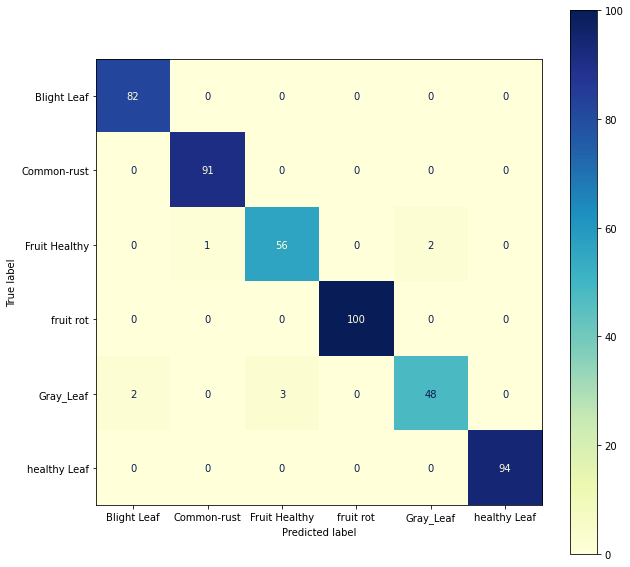

15/15 [==============================] - 4s 274ms/step - loss: 0.2020 - accuracy: 0.9833
Test Accuracy: 0.9832985401153564
Test loss : 0.2019720822572708
[1 2 5 1 5 2 5 5 5 5 1 1 5 0 3 0 0 1 2 1 3 1 2 0 2 0 4 1 0 3 2 3 2 3 3 5 2
 4 4 2 5 5 5 2 4 1 2 5 0 1 5 4 0 5 1 0 3 4 3 3 4 5 0 5 5 1 0 1 5 2 2 3 2 1
 0 4 3 5 2 0 0 5 1 1 0 0 1 4 4 0 0 3 3 5 1 3 5 5 1 3 4 1 0 5 4 3 3 0 2 5 2
 1 3 3 5 4 1 4 1 2 4 1 3 5 1 5 2 0 3 4 5 5 3 4 4 3 2 0 3 4 4 2 3 3 3 3 3 0
 1 5 3 4 1 1 2 3 1 1 0 2 1 3 4 1 3 3 2 2 1 0 5 5 5 0 0 1 0 2 3 5 1 5 1 5 2
 3 1 3 1 3 5 0 0 1 5 4 0 4 1 5 2 3 4 1 1 5 3 2 5 2 2 4 5 4 5 3 3 4 0 4 0 0
 3 0 3 3 3 1 5 1 5 3 3 2 5 4 4 5 4 2 0 0 4 3 1 3 3 0 3 1 5 5 0 1 1 0 5 0 2
 0 3 3 3 3 1 3 5 2 2 5 3 2 3 5 3 2 2 5 5 0 5 5 3 2 5 0 0 1 5 5 2 1 3 4 5 0
 3 3 1 3 5 1 3 0 1 5 3 4 1 1 2 3 1 1 5 3 4 0 3 0 1 4 5 2 1 1 5 5 3 0 1 5 4
 1 1 5 5 1 0 1 0 3 2 0 4 1 4 2 0 5 1 5 4 0 0 3 0 3 4 0 1 3 0 0 5 4 5 0 3 5
 5 2 5 2 2 3 3 1 1 4 1 1 3 1 1 5 0 3 5 5 2 5 3 0 3 1 5 5 0 0 1 2 3 1 5 0 3
 4 1 0 2 0 5 3 3 0 4 

In [20]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_test])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_z = np.argmax(y_test,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_z, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_test],y_test)
print('Test Accuracy:', score[1]) 
print('Test loss :', score[0])

from sklearn.metrics import classification_report
rp = np.argmax(pred,axis=-1)
print(rp)
print(classification_report(round_pred_z,round_pred))